In [ ]:
import pandas as pd
df = pd.read_csv("./data/Dengue.csv")
df.head()

,SAMPLE_ID,HGB,HCT,PLT,WBC,LYM,MON,EOS,OUTPUT,RBC,...,MCHC,RDWcv,RDWsd,MPV,PCT,PDW,NEU,BAS,ALY,LIC
0,1001,12.7,37.5,376,10.6,9.0,10.9,0.7,0,4.62,...,33.9,14.0,42,10.0,0.269,20.5,79.2,0.2,0.6,0.3
1,1002,14.8,49.0,104,4.9,54.0,4.0,2.0,0,5.24,...,30.2,12.1,38,10.0,0.440,15.6,40.0,0.0,0.4,0.5
2,159129,13.2,42.3,130,2.4,15.0,2.6,1.6,1,4.25,...,32.4,15.0,42,9.1,0.245,15.8,80.8,0.0,0.4,0.4
3,159122,15.6,46.8,126,3.9,41.7,8.1,2.6,0,4.52,...,33.3,13.5,50,11.0,0.138,20.3,47.3,0.3,0.8,0.2
4,159102,11.0,32.6,168,9.7,7.4,4.3,0.9,0,3.14,...,33.7,11.4,42,7.8,0.131,14.0,87.4,0.0,0.3,0.3


In [ ]:
dengue = df[['SAMPLE_ID','HGB', 'HCT', 'PLT', 'WBC', 'LYM', 'MON', 'EOS', 'OUTPUT']]

In [ ]:
dengue.head()

,SAMPLE_ID,HGB,HCT,PLT,WBC,LYM,MON,EOS,OUTPUT
0,1001,12.7,37.5,376,10.6,9.0,10.9,0.7,0
1,1002,14.8,49.0,104,4.9,54.0,4.0,2.0,0
2,159129,13.2,42.3,130,2.4,15.0,2.6,1.6,1
3,159122,15.6,46.8,126,3.9,41.7,8.1,2.6,0
4,159102,11.0,32.6,168,9.7,7.4,4.3,0.9,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
obtained_tree = decisiontree.fit(dengue[['HGB', 'HCT', 'PLT', 'WBC', 'LYM', 'MON', 'EOS']], dengue['OUTPUT'])


In [ ]:
hgb = input("Enter HGB value: ")
hct = input("Enter HGT value: ")
plt = input("Enter Platlet value: ")
wbc = input("Enter WBC value: ")
lym = input("Enter Lympocyte value: ")
mon = input("Enter Monocyte value: ")
eos = input("Enter Eosiphile value: ")

Enter HGB value: 13
Enter HGT value: 41.6
Enter Platlet value: 116
Enter WBC value: 3
Enter Lympocyte value: 80
Enter Monocyte value: 79
Enter Eosiphile value: 87


In [ ]:
OUT = obtained_tree.predict([[hgb, hct, plt, wbc, lym, mon, eos]])

if OUT == 1:
    print('Dengue: positive')
else:
    print('Dengue: negative')

Dengue: positive


In [ ]:
print(obtained_tree.predict([[13.8, 42.5, 160, 3.7, 60, 76, 40]]))
print(obtained_tree.predict([[14, 50, 400, 10, 60, 76, 40]]))


[1]
[0]


In [ ]:
predictions = obtained_tree.predict(dengue[['HGB', 'HCT', 'PLT', 'WBC', 'LYM', 'MON', 'EOS']])

print('Predicted Output: ',predictions.tolist())

print('Actual Output:       ',dengue['OUTPUT'].tolist())


Predicted Output:  [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
Actual Output:        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]


In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(dengue['OUTPUT'], predictions))

[[31  0]
 [ 0 19]]


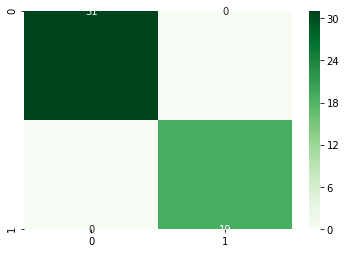

In [ ]:
#Heat map

import seaborn as sb

sb.heatmap(confusion_matrix(dengue['OUTPUT'], predictions), annot = True, cmap = 'Greens', xticklabels = decisiontree.classes_, yticklabels = decisiontree.classes_)


In [ ]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(dengue['OUTPUT'], predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        19

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



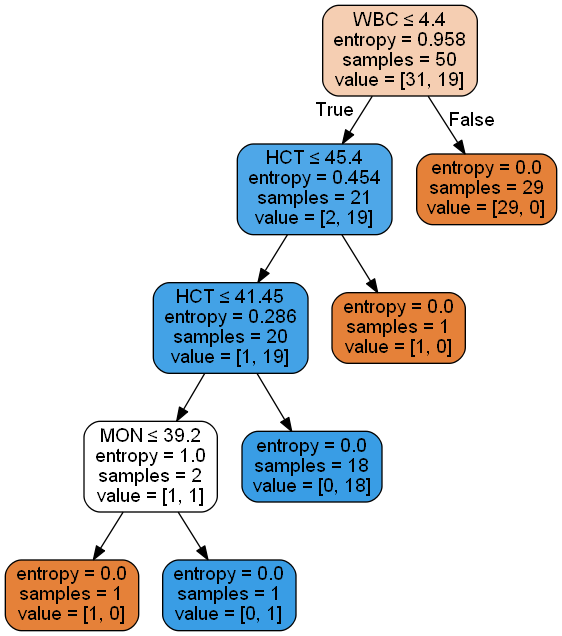

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

DecisionTreeImg = StringIO()

export_graphviz(obtained_tree, out_file = DecisionTreeImg, filled = True, rounded = True, feature_names = ['HGB', 'HCT', 'PLT', 'WBC', 'LYM', 'MON', 'EOS'], special_characters = True)

graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())

Image(graph.create_png())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(dengue.drop('OUTPUT',axis=1),dengue['OUTPUT'], test_size=0.30, random_state=101)

In [ ]:
#Logestic Regration

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
t = logmodel.predict(X_test)
print('Prediction of train dataset: {0}'.format(logmodel.predict(X_train)))
print('Prediction of test dataset: {0}'.format(logmodel.predict(X_test)))
print("--------------classification_report & confusion matrix--------------------------")
print(classification_report(y_test,t))
confusion = confusion_matrix(y_test,t)
print('Confusion Matrix: \n {0}'.format(confusion))
acc=accuracy_score(y_test,t)
print("---------------------------------------------------------------------------------------------")
print( 'Accuracy of Logistic Regression  is {0}'.format(acc))

Prediction of train dataset: [1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0]
Prediction of test dataset: [0 0 1 0 0 1 0 0 1 0 1 0 1 0 0]
--------------classification_report & confusion matrix--------------------------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.60      0.60      0.60         5

    accuracy                           0.73        15
   macro avg       0.70      0.70      0.70        15
weighted avg       0.73      0.73      0.73        15

Confusion Matrix: 
 [[8 2]
 [2 3]]
---------------------------------------------------------------------------------------------
Accuracy of Logistic Regression  is 0.7333333333333333


c:\users\strange\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
#RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
t = rfc.predict(X_test)
print('Prediction of train dataset: {0}'.format(rfc.predict(X_train)))
print('Prediction of test dataset: {0}'.format(rfc.predict(X_test)))
print("--------------classification_report & confusion matrix--------------------------")
print(classification_report(y_test,t))
confusion = confusion_matrix(y_test,t)
print('Confusion Matrix: \n {0}'.format(confusion))
acc=accuracy_score(y_test,t)
print("---------------------------------------------------------------------------------------------")
print( 'Accuracy of Random Forest  is {0}'.format(acc))



Prediction of train dataset: [0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0]
Prediction of test dataset: [0 0 1 0 0 1 0 0 1 1 1 0 1 0 1]
--------------classification_report & confusion matrix--------------------------
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.86      0.90      0.86        15
weighted avg       0.90      0.87      0.87        15

Confusion Matrix: 
 [[8 2]
 [0 5]]
---------------------------------------------------------------------------------------------
Accuracy of Random Forest  is 0.8666666666666667


In [ ]:
#KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
t= knn.predict(X_test)
print('Prediction of train dataset: {0}'.format(knn.predict(X_train)))
print('Prediction of test dataset: {0}'.format(knn.predict(X_test)))
print("--------------classification_report & confusion matrix--------------------------")
print(classification_report(y_test,t))
confusion = confusion_matrix(y_test,t)
print('Confusion Matrix: \n {0}'.format(confusion))
acc=accuracy_score(y_test,t)
print("---------------------------------------------------------------------------------------------")
print( 'Accuracy of KNN  is {0}'.format(acc))

Prediction of train dataset: [0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0]
Prediction of test dataset: [0 0 0 0 0 0 0 1 1 0 0 1 1 0 0]
--------------classification_report & confusion matrix--------------------------
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15

Confusion Matrix: 
 [[8 2]
 [3 2]]
---------------------------------------------------------------------------------------------
Accuracy of KNN  is 0.6666666666666666


In [ ]:
#Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train,y_train)
t = gnb.predict(X_test)
print('Prediction of train dataset: {0}'.format(gnb.predict(X_train)))
print('Prediction of test dataset: {0}'.format(gnb.predict(X_test)))
print("--------------classification_report & confusion matrix--------------------------")
print(classification_report(y_test,t))
confusion = confusion_matrix(y_test,t)
print('Confusion Matrix: \n {0}'.format(confusion))
acc=accuracy_score(y_test,t)
print("---------------------------------------------------------------------------------------------")
print( 'Accuracy of Naive Bayes  is {0}'.format(acc))


Prediction of train dataset: [1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0]
Prediction of test dataset: [0 0 1 0 0 0 0 0 1 1 1 0 1 0 0]
--------------classification_report & confusion matrix--------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.85      0.85      0.85        15
weighted avg       0.87      0.87      0.87        15

Confusion Matrix: 
 [[9 1]
 [1 4]]
---------------------------------------------------------------------------------------------
Accuracy of Naive Bayes  is 0.8666666666666667
